<a href="https://colab.research.google.com/github/Tomato-in-Japan/Subject_Fri1/blob/Homeworks/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9%E5%85%A5%E9%96%80_7%E5%9B%9E%E7%9B%AE_%E3%83%AF%E3%83%BC%E3%82%AF%E3%82%B7%E3%83%BC%E3%83%88%EF%BC%88%E7%99%BA%E5%B1%95%E8%BE%BC%E3%81%BF%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 学習目標
　データサイエンスでは多量なデータを操作して統計処理や機械学習による何らかの手法を用いて分析を行います。これまでにデータの操作について学んできました。ここからはデータを分析する手法について学びます。この授業回では、データサイエンスで一般的に行われる教師あり学習の手法のひとつである重回帰を学びます。重回帰はすでに実装が一般的に行われており、ライブラリとして提供されています。本ワークシートでは、ライブラリを活用して重回帰による分析ができるようになることを目標とします。
今回の実習は例題はなく、課題のみから構成されます。重回帰の理論については講義ビデオを見て学んでください。ライブラリの活用については使用するメソッド名などのキーワードを提示しますので、ネット上には解説記事が多数ありますので検索して各自調べながら取り組んでください。

# 1. 導入

## 1-1. 概要

健康に関わるデータから重回帰による分析を試みます。
データの項目は「体重」と「摂取したカロリー」と「お酒を飲んだ量」とします。
このデータから、「ある日の体重」は「前の日の体重」「摂取したカロリー」「お酒を飲んだ量」から求められると仮定して重回帰のモデルを構築して性能を評価します。

## 1-2. ライブラリのインポート

分析に必要なライブラリをインポートします。
必要なライブラリは「データの読込・操作を行うライブラリ」「重回帰のライブラリ」です。

 - データの読込・操作を行うライブラリ：Pandas
 - 重回帰のライブラリ：Scikit-learnのLinearRegression


```python
# データの加工・処理・分析ライブラリ
import pandas as pd

# 重回帰のライブラリのインポート
from sklearn.linear_model import LinearRegression
```

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 2. データ

今回使うデータはポータルからファイルを配布しています。
ファイル名は「health_data.csv」です。

まずは、csvファイルを読み込んでデータを操作できるようにしましょう。
データを操作できるようにするには、csvファイルを pandas の DaraFrame として読み込みます。読み込み方法はこれまでの授業で扱っていますので必要に応じて動画やワークシートを参照してください。

データの項目は、前述の通りに、前日の体重、摂取カロリー、飲酒量、体重です。
csvファイルのカラム名は「前日の体重」から順番に previous, calory, drinking, weight です。

In [ ]:
# CSVデータを pandas の DataFrame オブジェクト df として読み込み
df = pd.read_csv('health_data.csv')


まずは df の中身を確認してみましょう。以下のセルにdfの中身を表示するプログラムを記述して実行して下さい。

## 2-1 データを表示

In [ ]:
# df を表示
print(df)

     previous  calory  drinking  weight
0          48    2000       300      50
1          50    1600         0      52
2          52    1400       100      51
3          51    2500       600      52
4          50    2200         0      53
..        ...     ...       ...     ...
104        52    1689       550      52
105        52    1307         0      52
106        52    1206         0      51
107        51    1525         0      51
108        51    1464         0      51

[109 rows x 4 columns]


実行すると「109 rows × 4 columns」が末尾にあることを確認します。確認できればOKです。これで109行、4列のデータであることが分かります。
それぞれの列が前日の体重（previous）、摂取カロリー（calory）、飲酒量（drinking）、体重（weight）と対応しています。
日毎の各項目の値を表しており、109日分のデータが入っていることがわかります。

## 2-2 説明変数・目的変数の設定

今回、ある日の体重を、「前の日の体重」と「摂取したカロリー」と「お酒を飲んだ量」から求められると仮定して重回帰による分析を試みます。

具体的な重回帰のモデル式は下記を想定します。
$$
y_{体重} = \beta_0 + \beta_{前日の体重} x_{前日の体重} + \beta_{摂取カロリー} x_{摂取カロリー} + \beta_{飲酒量} x_{飲酒量}
$$

説明変数は下記となります
 - 「前の日の体重」　previous
 - 「摂取したカロリー」　calory
 - 「お酒を飲んだ量」　drinking

目的変数は下記となります
 - 「体重」　weight

読み込んだデータを操作して説明変数と目的変数を設定するプログラムを記述して実行してください。ここでプログラム上の説明変数の変数名は x 、目的変数の変数名は y とします。

In [ ]:
# 目的変数xにdfの「weight」
# 説明変数yにdfの「previous」、「calory」、「drinking」を指定
X_p = df['previous'].values
X_c = df['calory'].values
X_d = df['drinking'].values
X = df
X = df.drop('weight',axis=1)
y=df['weight'].values
print(X)
print(y)

     previous  calory  drinking
0          48    2000       300
1          50    1600         0
2          52    1400       100
3          51    2500       600
4          50    2200         0
..        ...     ...       ...
104        52    1689       550
105        52    1307         0
106        52    1206         0
107        51    1525         0
108        51    1464         0

[109 rows x 3 columns]
[50 52 51 52 53 52 52 51 52 53 52 53 52 51 53 52 50 50 51 51 51 49 50 50
 50 51 51 50 49 50 52 51 51 51 51 51 50 52 52 52 53 55 56 56 56 56 56 55
 55 54 54 54 53 53 52 52 53 52 52 51 51 51 51 52 52 52 53 53 53 52 53 51
 50 50 49 50 49 50 50 50 50 51 51 52 52 52 51 51 52 51 52 52 53 53 53 52
 52 51 53 52 50 51 51 52 52 52 51 51 51]


## 2-3 相関係数の確認

説明変数について調べる。説明変数の変数同士の相関係数を求めましょう。corrメソッドにより求めることができます。

In [ ]:
soukan=df.corr()
print(soukan)

          previous    calory  drinking    weight
previous  1.000000 -0.241715 -0.111570  0.814457
calory   -0.241715  1.000000  0.239899  0.207838
drinking -0.111570  0.239899  1.000000  0.131203
weight    0.814457  0.207838  0.131203  1.000000


得られた結果を見て、重回帰のモデルの係数の有意性の観点から何が言えるかを下記のセルに記述しましょう。

$$
y_{体重} = \beta_0 + \beta_{前日の体重} x_{前日の体重} + \beta_{摂取カロリー} x_{摂取カロリー} + \beta_{飲酒量} x_{飲酒量}
$$



1.   体重と前の日の体重の正の相関が大きく、
2.   飲酒量と摂取カロリーでは小さな正の相関がある。
3.   前日の体重と飲酒量、接種カロリーでは、負の小さい相関がある



# 3 モデルの構築と評価

読み込んだデータに対して重回帰のモデルを構築します。ここからが機械学習（重回帰）の本番です。

機械学習ライブラリ「scikit-learn」を利用する事により、「重回帰」を簡単に実装する事が出来ます。（scikit-learnの読み方はサイキットラーン）

それでは、説明変数と目的変数を設定して学習を実行しましょう。プログラムは、LinearRegressionを初期化して、学習はfitメソッドを利用することにより実行できます。

$$
y_{体重} = \beta_0 + \beta_{前日の体重} x_{前日の体重} + \beta_{摂取カロリー} x_{摂取カロリー} + \beta_{飲酒量} x_{飲酒量}
$$

In [ ]:
y_1=LinearRegression()
y_1.fit(X,y)
print(y_1.coef_)

[0.89836309 0.00169585 0.00103089]


以上で学習は完了です。

次に、学習結果の評価を行います。score メソッドを利用する事により決定係数を計算できます。

決定係数はデータに対する、推定されたモデルの当てはまりの良さ（度合い）を表し、$0$ から $1$ までの値をとります。$1$ に近いほど、当てはまりが良いです。

ここで、「決定係数はいくつ以上なら良いのか？」という疑問が生じますが、この問いに対する絶対的な回答は存在しません。

ここでは、参考として「$R^2 \geq 0.8$：精度良い」、「$R^2 \geq 0.5$：精度やや良い」、「$R^2 < 0.5$：精度良くない」という基準を紹介します（cf. https://istat.co.jp/ta_commentary/multiple_02 ）。

では、実際に決定係数を計算してみましょう。

In [ ]:
print(y_1.score(X,y))

0.8554319110013583


また、偏回帰係数を確認しましょう。偏回帰係数は coef_ と intercept_ から参照できます。

In [ ]:
print(y_1.coef_)
print(y_1.intercept_)

[0.89836309 0.00169585 0.00103089]
2.571795527798983


発展課題

Y=weight,X=previous


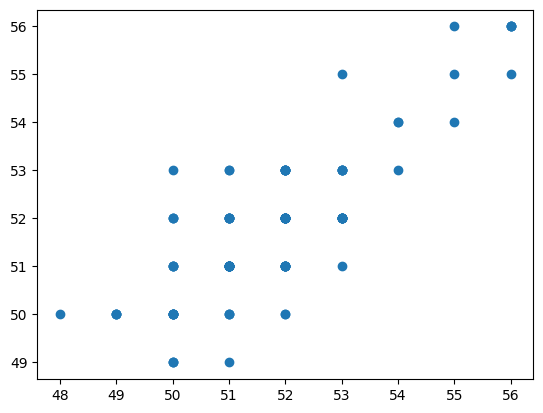

In [33]:
import matplotlib.pyplot as plt
print("Y=weight,X=previous")
x1 = df['previous'].values
y1=df['weight'].values
plt.scatter(x1,y1)


Y=weight,X=calory


<function matplotlib.pyplot.show(close=None, block=None)>

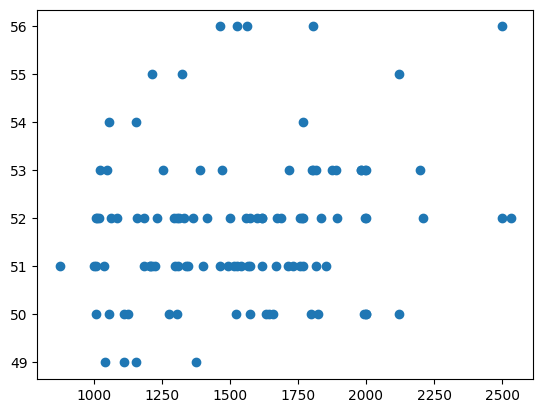

In [31]:
print("Y=weight,X=calory")
x2 = df['calory'].values
y2=df['weight'].values
plt.scatter(x2,y2)
plt.show

Y=weight,X=drinking


<function matplotlib.pyplot.show(close=None, block=None)>

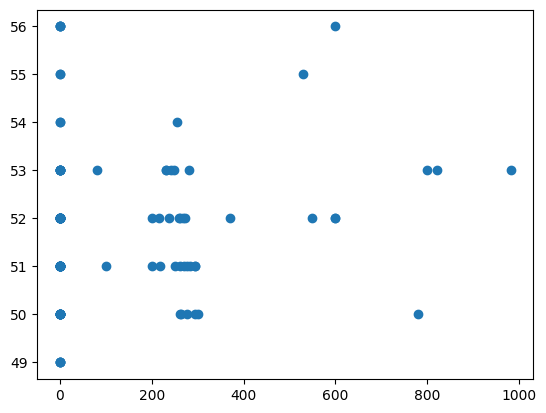

In [32]:
print("Y=weight,X=drinking")
x3 = df['drinking'].values
y3=df['weight'].values
plt.scatter(x3,y3)
plt.show